In [58]:
using DelimitedFiles
using Plots
using Optim

┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1278


In [14]:
function smooth_pk(k, keq, ns, A)
    q = k./keq
    L = log.(2*exp(1) .+ 1.8.*q)
    C =  14.2 .+ 731 ./(1 .+ 62.5.*q)
    T = L./(L .+ C.*q.^2)
    Pk = k.^ns.*T.^2
    return A.*Pk
end

smooth_pk (generic function with 2 methods)

In [99]:
kpk = readdlm("../data/test_pk.txt", comments=true)
k = kpk[:,1]
pk = kpk[:,2]
kfit = kpk[1:427,1]
pkfit = kpk[1:427,2];

In [141]:
fsmooth(x) = sum((pk .- smooth_pk(k, x[1], x[2], x[3])).^2 .*k.^6)
bf_pk_smooth = optimize(fsmooth, [0.2, 1.0, 1000.0])

 * Status: success

 * Candidate solution
    Final objective value:     1.035373e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    885
    f(x) calls:    1548


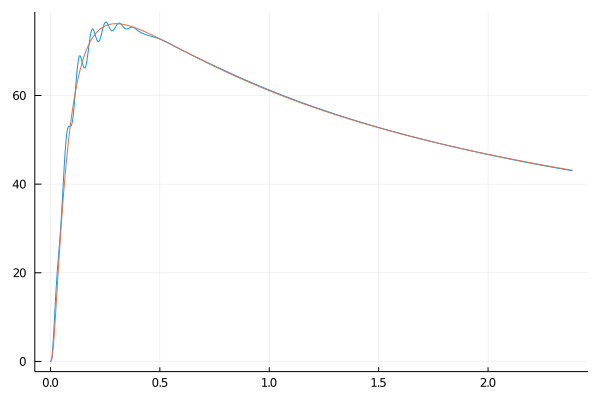

In [142]:
plot(k, pk.*k.^2, label=:none)
keq, ns, A = Optim.minimizer(bf_pk_smooth)
plot!(k, smooth_pk(k, keq, ns, A).*k.^2, label=:none)

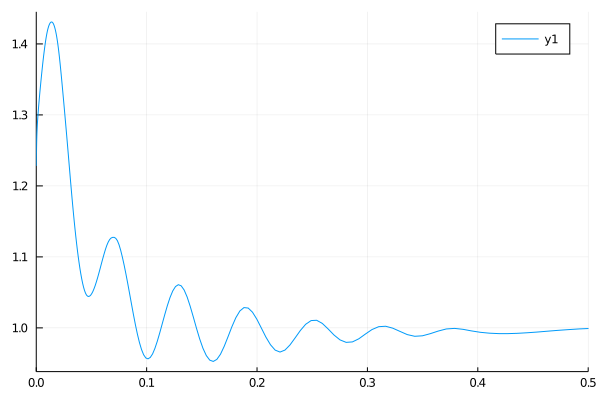

In [138]:
plot(k, pk./smooth_pk(k, keq, ns, A), xlims=(0, 0.5))

In [151]:
writedlm("../data/test_smooth_pk.txt", [k smooth_pk(k, keq, ns, A)])